## 환율 데이터 가져오기

- 한국은행 API 사용

- 한국을 기준으로 다른 국가의 환율을 비교

In [1]:
import json
from urllib.request import urlopen
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.core.display import display, HTML
from matplotlib import font_manager,rc
font_location='C:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

display(HTML("<style>.container{width:90% !important;}</style>"))

sns.set_palette("pastel")
sns.set_style('whitegrid')

f = open('api_key.txt', 'r')
api_key = f.readline()
f.close()

key = api_key
stat_code = pd.read_csv('stat_code.csv', dtype = str, encoding = 'euc-kr') # 한국은행 api통계코드 참조

nara = stat_code['Stat_code'].to_list()
url = "http://ecos.bok.or.kr/api/StatisticSearch/"+key+"/json/kr/1/100000/036Y001/DD/20180401/date/0000001/?/?/"  # 환율

ex_nations = []
ex_rates = []
time = []

for i in range(len(nara)):

    data=json.loads(urlopen(url[:-12]+nara[i]+url[-5:]).read())
    
    try:
        data2=data['StatisticSearch']['row']
        nation = stat_code['Nation'][i]
        ex_nations.append(nation)
        
        for k in range(len(data2)):
            if i==0:
                time.append(int(data2[k]['TIME']))
            ex_rate = float(data2[k]['DATA_VALUE'])
            ex_rates.append(ex_rate)
    except:
        print(nation,'No Search')

time = pd.to_datetime(pd.DataFrame(time)[0].apply(lambda x: str(x))).to_list()

ex_data = pd.DataFrame(np.reshape(ex_rates, (-1,len(data2))), 
                       columns = time,
                       index = ex_nations)
ex_data.head()

유로 No Search
유로 No Search
유로 No Search
유로 No Search
유로 No Search
유로 No Search
유로 No Search
유로 No Search
뉴질랜드달러 No Search
인도네시아루피아(100루피아) No Search


2018-04-02  2018-04-03  2018-04-04  2018-04-05  2018-04-06  \
미국달러          1064.40     1058.10     1057.80     1057.60     1059.50   
일본엔(100엔)     1000.80      999.67      992.82      990.68      989.03   
유로            1311.07     1301.73     1298.08     1299.31     1297.41   
영국파운드         1493.62     1487.11     1487.64     1489.89     1483.78   
캐나다달러          825.85      819.28      826.21      828.94      829.19   

           2018-04-09  2018-04-10  2018-04-11  2018-04-12  2018-04-13  ...  \
미국달러          1066.00     1067.50     1067.70     1066.40     1068.70  ...   
일본엔(100엔)      997.52     1000.33      996.17      998.27      996.50  ...   
유로            1308.52     1315.53     1319.57     1319.08     1317.49  ...   
영국파운드         1502.05     1508.54     1513.73     1512.42     1521.03  ...   
캐나다달러          834.47      840.22      847.58      848.23      848.88  ...   

           2021-08-18  2021-08-19  2021-08-20  2021-08-23  2021-08-24  \
미국달러          1174.90     1172.70     1174.50     1176.70     1174.00   
일본엔(100엔)     1071.94     1068.08     1069.92     1070.94     1070.34   
유로            1375.46     1373.76     1371.52     1376.03     1379.04   
영국파운드         1614.14     1613.34     1601.25     1603.08     1611.37   
캐나다달러          930.84      926.89      915.54      917.72      927.95   

           2021-08-25  2021-08-26  2021-08-27  2021-08-30  2021-08-31  
미국달러          1168.00     1166.50     1168.10     1170.80     1164.40  
일본엔(100엔)     1064.77     1060.31     1061.47     1065.87     1058.88  
유로            1373.16     1373.09     1373.39     1381.31     1373.70  
영국파운드         1603.43     1605.45     1600.65     1611.49     1602.16  
캐나다달러          927.54      926.42      921.00      928.25      923.83  

[5 rows x 846 columns]

- 계속 StatisticSearch 없다고 오류가 뜨길래 오류나는 부분을 보았더니.. 몇몇 나라는 제공이 안되고 있었다.
  - 결국 해결하긴 했는데 문제 찾는데 오래걸렸다..
- 10개정도가 제외되고 한국 -> 다른나라(43개)로 가는 환율을 가져오는데 성공했다.

In [2]:
ex_data.T.corr()

미국달러  일본엔(100엔)        유로     영국파운드     캐나다달러     스위스프랑  \
미국달러              1.000000   0.872257  0.414961  0.246879  0.526801  0.598330   
일본엔(100엔)         0.872257   1.000000  0.597882  0.266739  0.488649  0.780656   
유로                0.414961   0.597882  1.000000  0.662915  0.660658  0.880299   
영국파운드             0.246879   0.266739  0.662915  1.000000  0.749540  0.614759   
캐나다달러             0.526801   0.488649  0.660658  0.749540  1.000000  0.675400   
스위스프랑             0.598330   0.780656  0.880299  0.614759  0.675400  1.000000   
홍콩달러              0.991273   0.899607  0.490699  0.308025  0.557396  0.685944   
스웨덴크로나           -0.104056   0.124287  0.810028  0.614870  0.460637  0.631268   
호주달러             -0.268497  -0.128767  0.553663  0.544249  0.461032  0.298381   
덴마크크로네            0.374851   0.566023  0.998652  0.665998  0.650219  0.871114   
노르웨이크로네          -0.372262  -0.496649 -0.135063 -0.007954  0.088624 -0.467813   
사우디아라비아리알         0.999913   0.871936  0.415822  0.248163  0.530504  0.597544   
쿠웨이트디나르           0.982614   0.834284  0.427651  0.324103  0.627438  0.581127   
바레인디나르            0.999527   0.873243  0.416990  0.251215  0.534338  0.601711   
아랍연방토후국 더히람       1.000000   0.872270  0.414941  0.246862  0.526792  0.598304   
싱가폴달러             0.895953   0.864414  0.552885  0.484850  0.731038  0.687517   
말레이지아링기트          0.825475   0.772995  0.285289  0.194308  0.444245  0.384913   
뉴질랜드달러           -0.131434   0.001793  0.545443  0.639224  0.538267  0.383960   
태국바트              0.782426   0.876402  0.408213  0.277387  0.549372  0.627604   
인도네시아루피아(100루피아)  0.680825   0.652311  0.156790  0.226325  0.488712  0.339426   
대만달러              0.544504   0.666544  0.817505  0.741998  0.713497  0.938376   
몽골투그릭             0.293575   0.020805 -0.420992 -0.451984 -0.252013 -0.481787   
카자흐스탄텡게           0.083708  -0.145674 -0.530298 -0.455407 -0.323239 -0.616033   
필리핀페소             0.719496   0.847118  0.754787  0.579816  0.681968  0.927634   
베트남동(100동)        0.986201   0.879013  0.469516  0.327023  0.585763  0.632661   
브루나이달러            0.898988   0.860086  0.541027  0.474487  0.727485  0.675177   
인도루피              0.563438   0.374684 -0.157928 -0.158891  0.113689 -0.146121   
파키스탄루피           -0.347801  -0.574151 -0.615600 -0.507629 -0.568918 -0.808494   
방글라데시타카           0.991236   0.837996  0.359637  0.183108  0.473789  0.528071   
멕시코 페소            0.078347  -0.095721 -0.356773 -0.057114  0.195213 -0.356313   
브라질 헤알           -0.039781  -0.287255 -0.672694 -0.543218 -0.347968 -0.743118   
아르헨티나페소          -0.368830  -0.508689 -0.607837 -0.603066 -0.641776 -0.821405   
러시아루블             0.356315   0.109716 -0.425253 -0.252329  0.001653 -0.391176   
헝가리포린트            0.035380  -0.147006 -0.224462 -0.273099 -0.142547 -0.470604   
폴란트즈워티            0.341388   0.350429  0.401010  0.169245  0.308987  0.196076   
체코코루나             0.120140   0.191505  0.678560  0.731001  0.741844  0.487537   
카타르리얄             0.994343   0.865294  0.390634  0.216153  0.500625  0.572132   
이스라엘셰켈            0.603941   0.730116  0.775376  0.730946  0.814552  0.917389   
요르단디나르            0.999899   0.874546  0.417897  0.251205  0.530793  0.602073   
터키리라             -0.040892  -0.205142 -0.608611 -0.561343 -0.497586 -0.696133   
남아프리카공화국랜드       -0.421832  -0.582738 -0.521024 -0.162030 -0.107003 -0.707297   
이집트파운드            0.771093   0.858526  0.675050  0.597762  0.711658  0.898088   
위안                0.319512   0.401740  0.688347  0.749198  0.612846  0.645188   

                      홍콩달러    스웨덴크로나      호주달러    덴마크크로네  ...    헝가리포린트  \
미국달러              0.991273 -0.104056 -0.268497  0.374851  ...  0.035380   
일본엔(100엔)         0.899607  0.124287 -0.128767  0.566023  ... -0.147006   
유로                0.490699  0.810028  0.553663  0.998652  ... -0.224462   
영국파운드             0.308025  0.614870  0.544249  0.665998  ... -0.273099   
캐나다달러             0.557396  0.460637  0.461032  0.650219  ... -0.142547   
스위스프랑  

- 상관성을 확인해보았다.
- 주요국(일본, 미국 등)의 환율은 높은 상관성을 보이기도한다.
- 국제적인 영향을 많이 받는 환율인데 생각보다 상관성이 다양하게 분포되어있다.

C:\Users\icear\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\icear\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


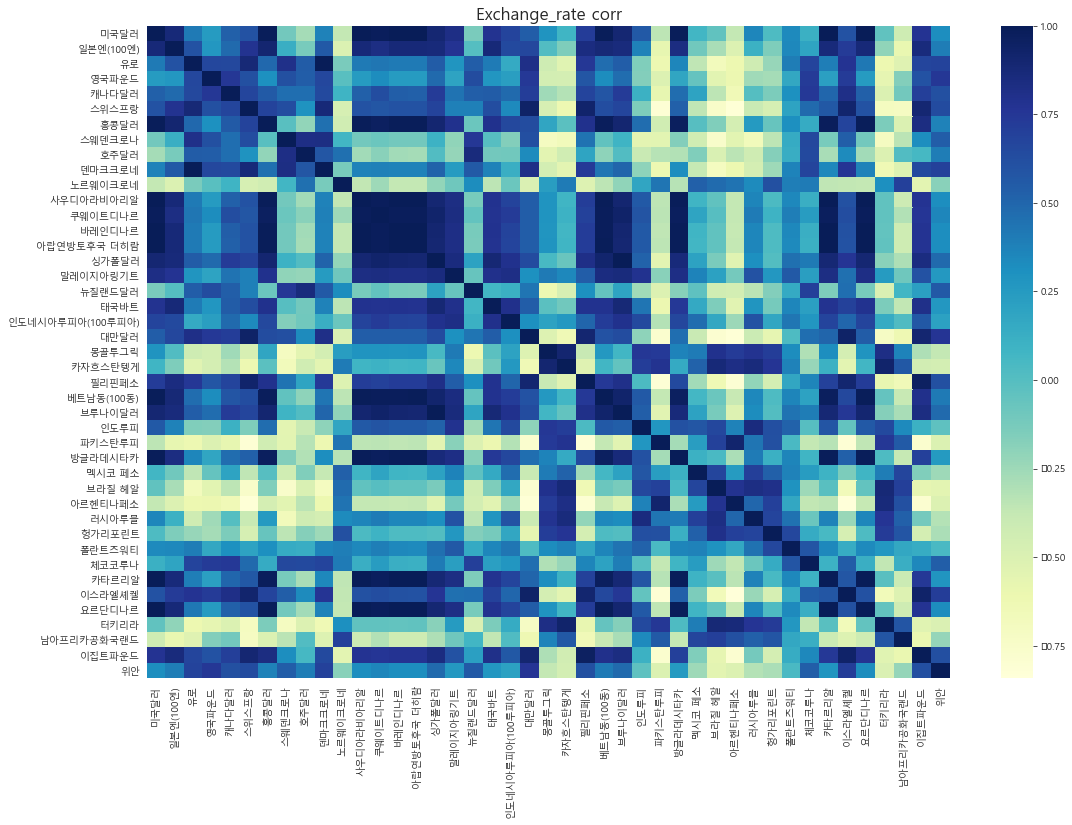

In [3]:
from matplotlib import font_manager,rc
font_location='C:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
f, ax = plt.subplots(figsize = (18,12))

sns.heatmap(ex_data.T.corr(), 
            cmap ='YlGnBu',
            annot = False).set_title('Exchange_rate corr', fontsize = 17)

plt.show()

- 히트맵을 그려도 판단이 잘 되지않는다.
- k-means clustering을 사용해서 cluster를 나눠보겠다.

In [4]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

scaler = MinMaxScaler()

s_ts = to_time_series_dataset(scaler.fit_transform(ex_data.T).T)

dist = []
scores = [] # 실루엣 스코어

for k in range(2,12):
    k_means = TimeSeriesKMeans(n_clusters = k, metric= 'dtw', max_iter = 5, random_state = 1234)
    k_means.fit(s_ts)
    pred = k_means.predict(s_ts)
    score = silhouette_score(s_ts.reshape(-1,len(data2)), pred)
    scores.append(score)
    dist.append(k_means.inertia_)
    
print(scores)
k_means.cluster_centers_.shape

C:\Users\icear\anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


[0.3922508694308424, 0.3391399187750096, 0.3100613383979408, 0.25589338457464456, 0.22427810955473396, 0.20855432216530267, 0.25745769705789034, 0.25889864132367785, 0.24923628999032058, 0.21788099801483457]


(11, 846, 1)

- 환율마다 단위가 다 다르므로 min_max_scaling을 진행해서 전부 0~1사이로 만들고 clustering을 진행(clustering이 잘되길...)
- 평가를 위해 실루엣 score로 k-means의 k값을 평가해보겠다.

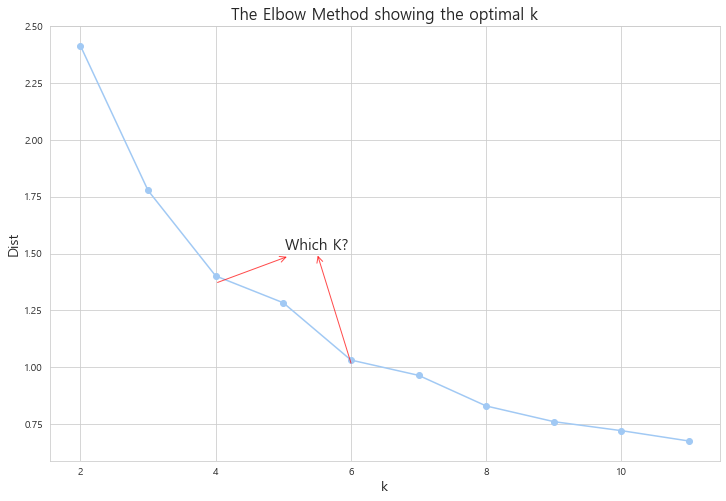

In [5]:
f, ax = plt.subplots(figsize = (12,8))
plt.plot(range(2,12), dist, '-o')

plt.annotate('Which K?',
             ha = 'center', 
             va = 'bottom',
             xytext = (5.5, 1.5),
             xy = (4, 1.37),
             fontsize = 15,
             arrowprops = {
                 'edgecolor':'r', 
                 'alpha':0.7,
                 'arrowstyle':'<-'
             })

plt.annotate('',
             ha = 'center', 
             va = 'bottom',
             xytext = (5.5, 1.5),
             xy = (6.01, 1.01),
             fontsize = 15,
             arrowprops = {
                 'edgecolor':'r', 
                 'alpha':0.7,
                 'arrowstyle':'<-'
             })

plt.xlabel('k', fontsize = 14)
plt.ylabel('Dist', fontsize = 14)
plt.title('The Elbow Method showing the optimal k', fontsize = 16)
plt.show()

- Elbow로 보니까 k=4? 음.. k=6인거같기도 하다.
- k=4, k=6둘다 해볼 예정이다

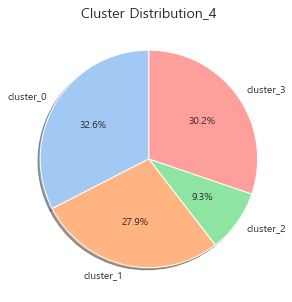

In [6]:
import collections

def pie_plot(k_num):
    
    k_means = TimeSeriesKMeans(n_clusters = k_num, metric= 'dtw', max_iter = 5, random_state = 1234)
    t_data = k_means.fit_predict(s_ts)

    labels = []
    sizes = []

    for w in range(k_num):
        labels.append('cluster_'+str(w))
        sizes.append(collections.Counter(t_data)[w])

    f, ax = plt.subplots(figsize = (10,5))
    plt.pie(sizes,
            labels = labels,
            shadow = True,
            startangle = 90,
            autopct = '%1.1f%%')

    plt.title('Cluster Distribution_'+str(k_num), fontsize = 14)
    plt.show()
    
pie_plot(k_num = 4)

- 4개의 cluster로 나눴을때 cluster_0이 가장 많이 들어가 있다. cluster_2가 가장 적게 들어가있는데 그 외에는 고루 들어가있는듯 하다.

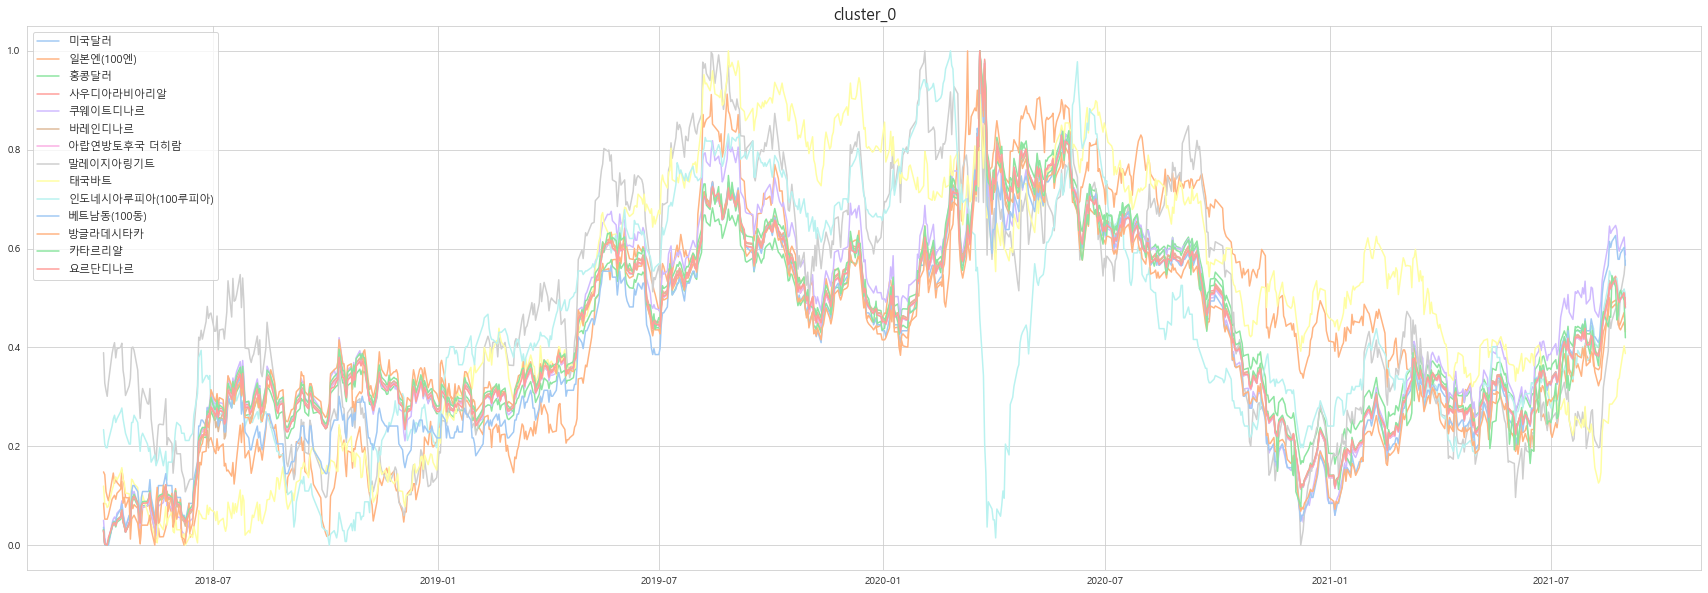

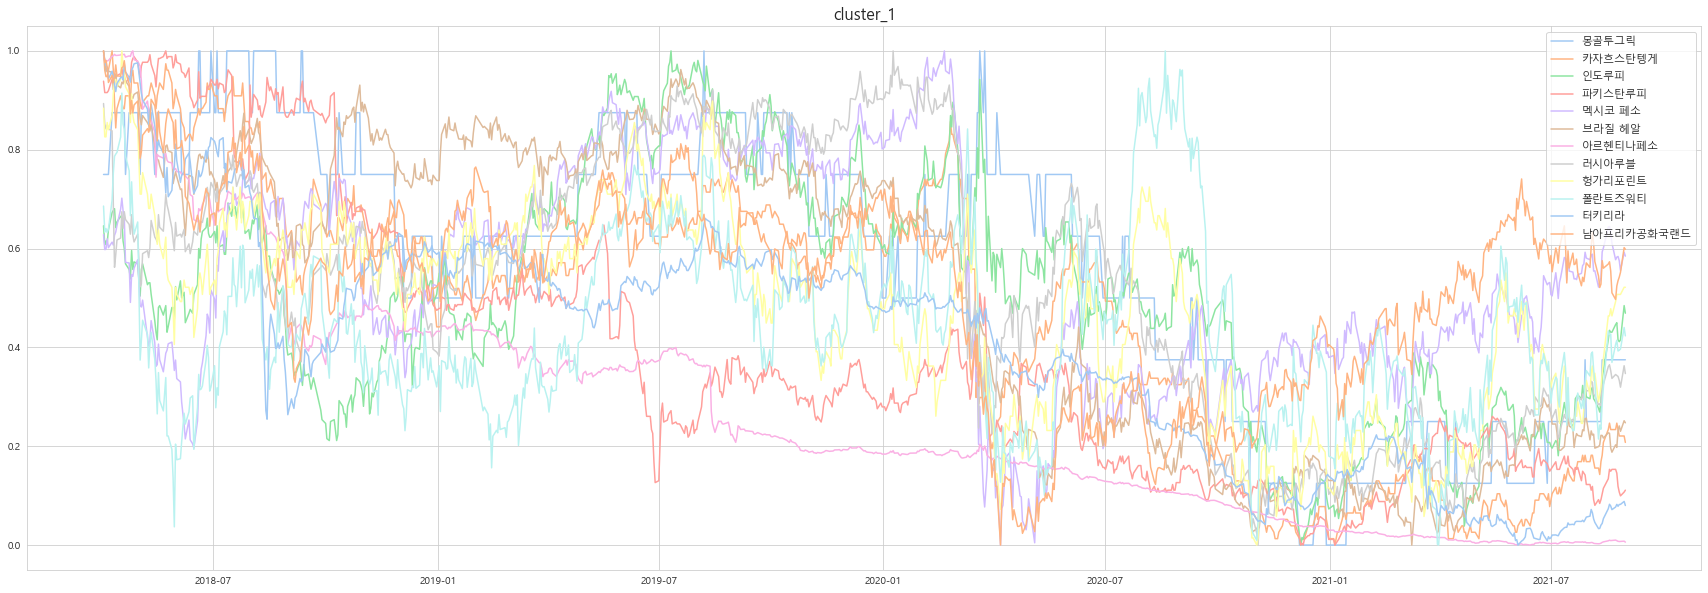

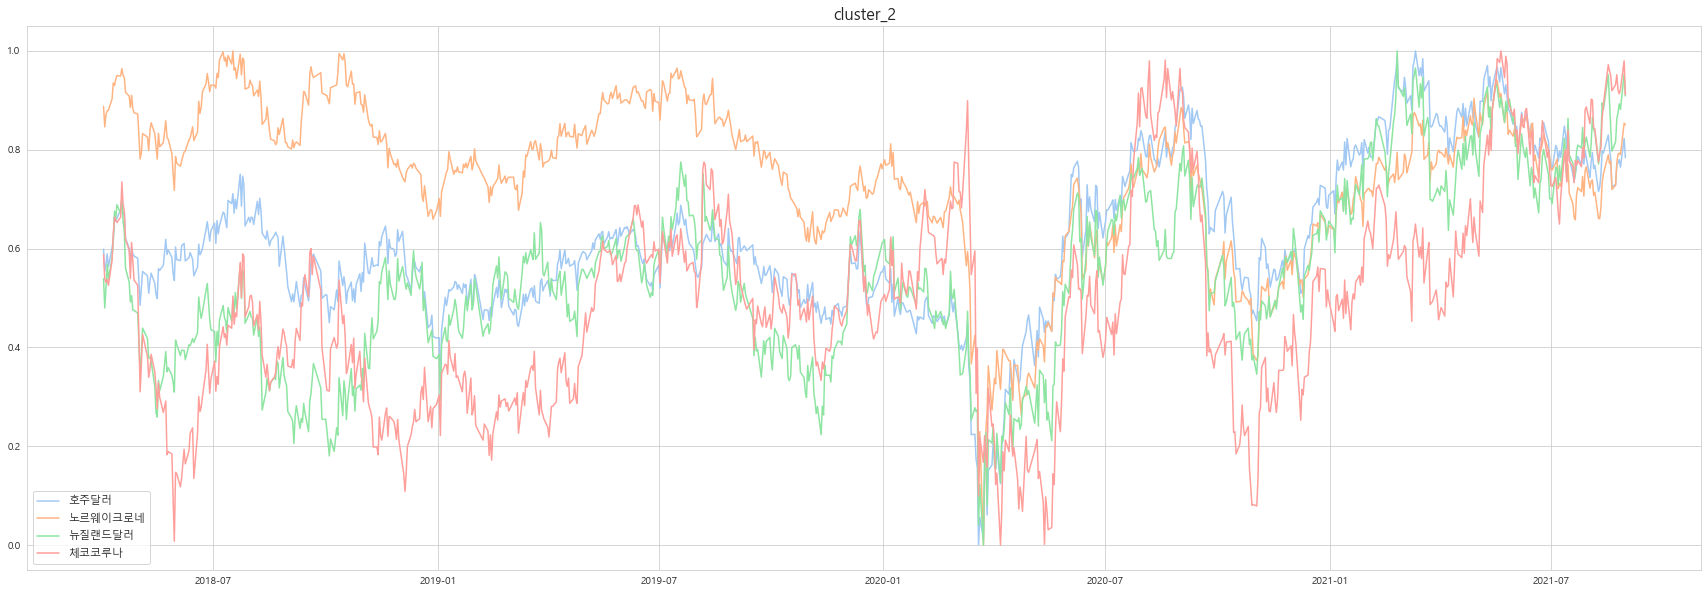

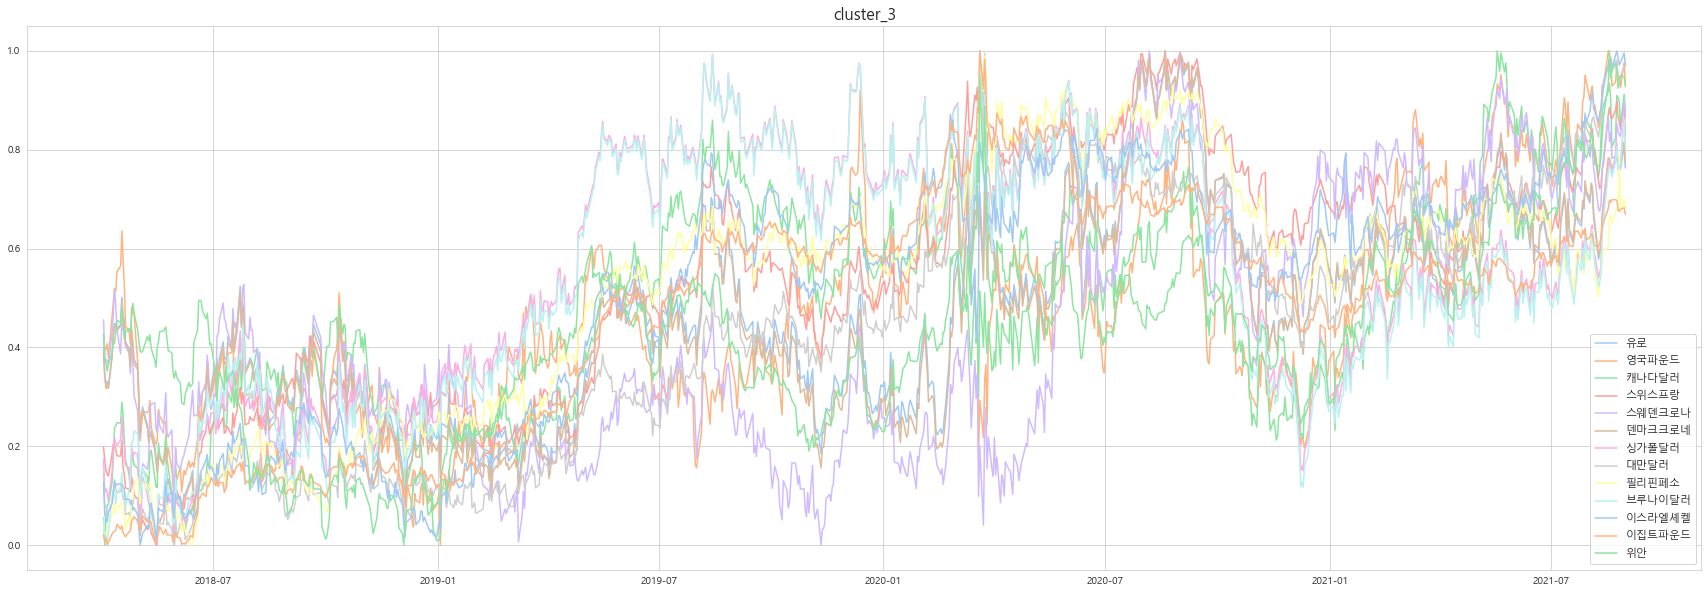

In [7]:
def cluster_plot(k_num):
    k_means = TimeSeriesKMeans(n_clusters = k_num, metric= 'dtw', max_iter = 5, random_state = 1234)
    t_data = k_means.fit_predict(s_ts)

    for i in range(k_num):  
        cluster_filter = np.where(t_data==i)
        f, ax = plt.subplots(figsize = (30,10))
    
        plt.plot(pd.DataFrame(s_ts[cluster_filter[0].tolist()].reshape(-1,len(data2)).T, 
                              columns = ex_data.T.columns[cluster_filter[0].tolist()], 
                              index = time))
        plt.title('cluster_'+str(i), fontsize = 16)
        plt.legend(ex_data.T.columns[cluster_filter[0].tolist()], fontsize = 11)
        plt.show()

cluster_plot(k_num = 4)

- 눈으로 봤을때는 어느정도 잘 clustering이 된듯 하다.
- 하지만 몇몇 나라들은 그 cluster에 맞지 않는듯하다.

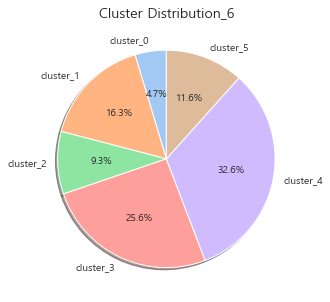

In [8]:
pie_plot(k_num = 6)

- cluster가 고루 분포되어있지않고 편중되어 있는 편이다. cluster_0은 전체의 4.7%로 매우 작은 편에 속한다.

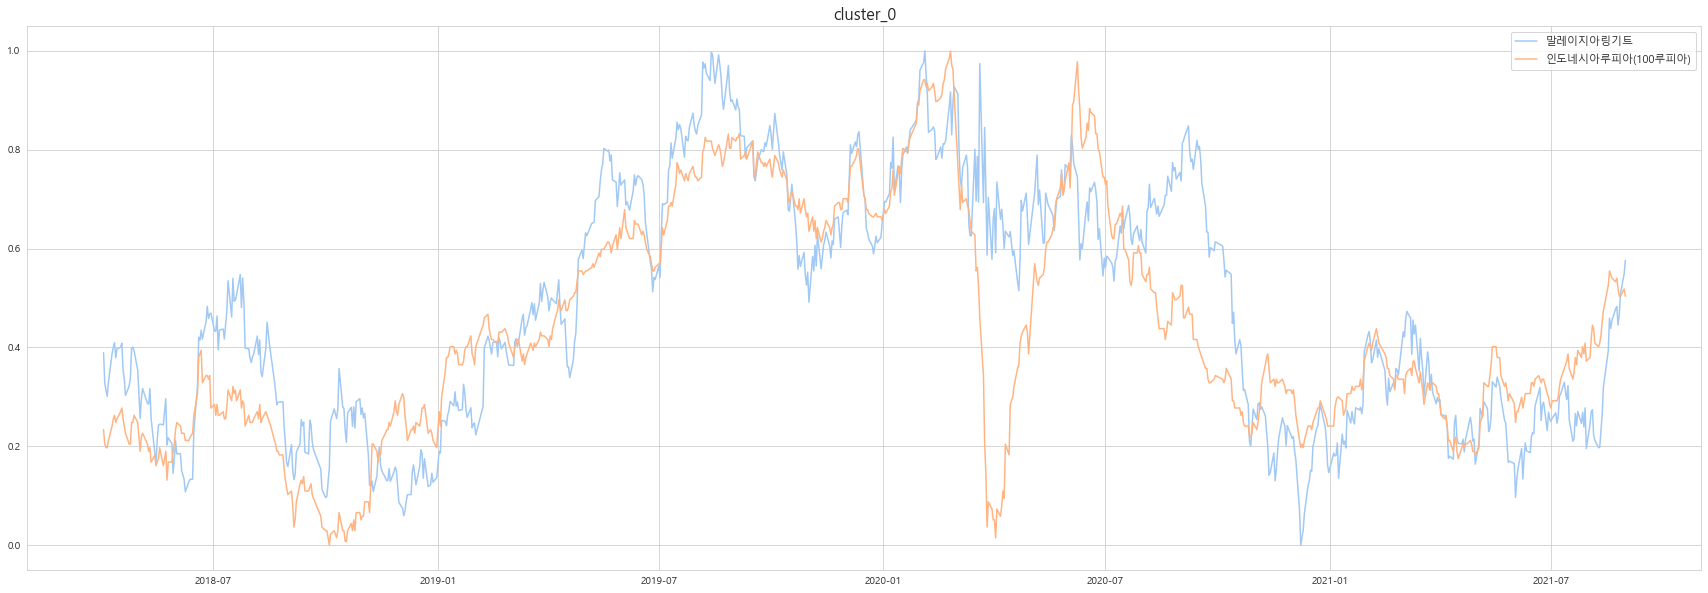

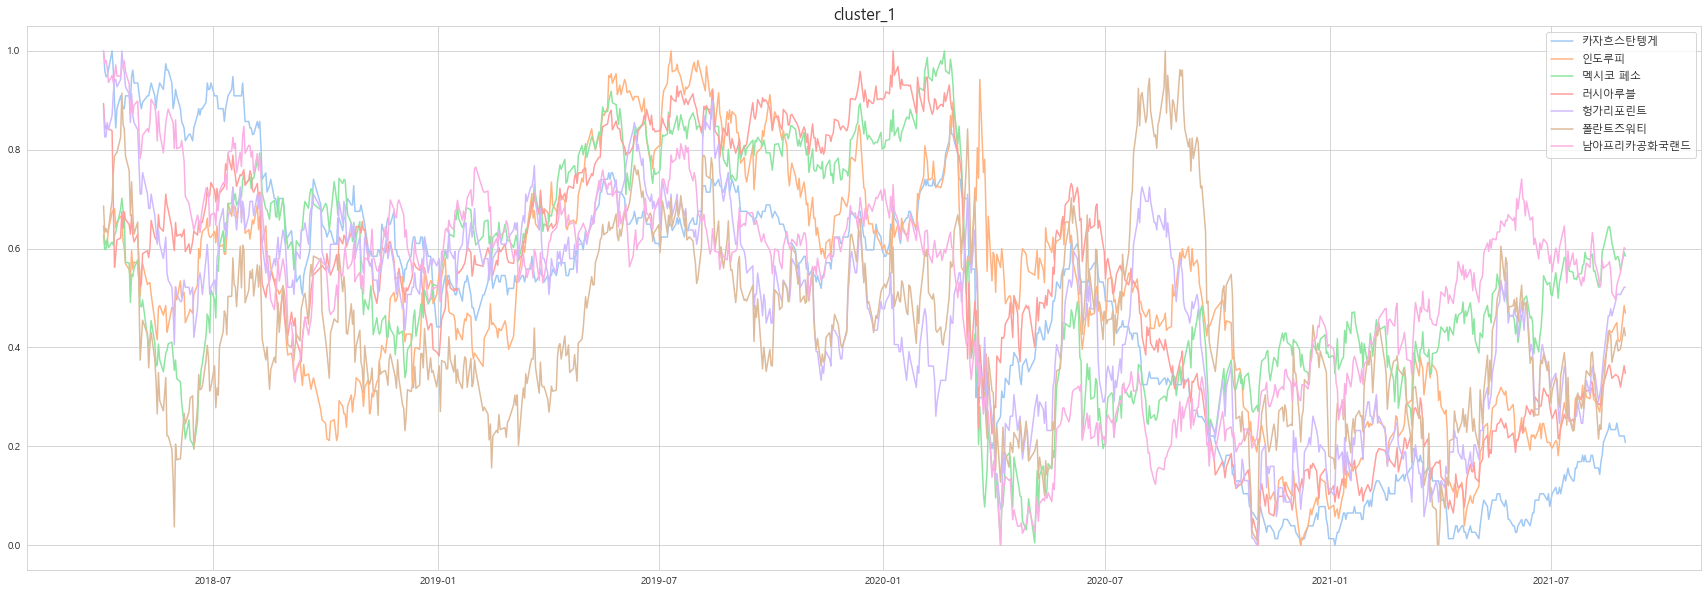

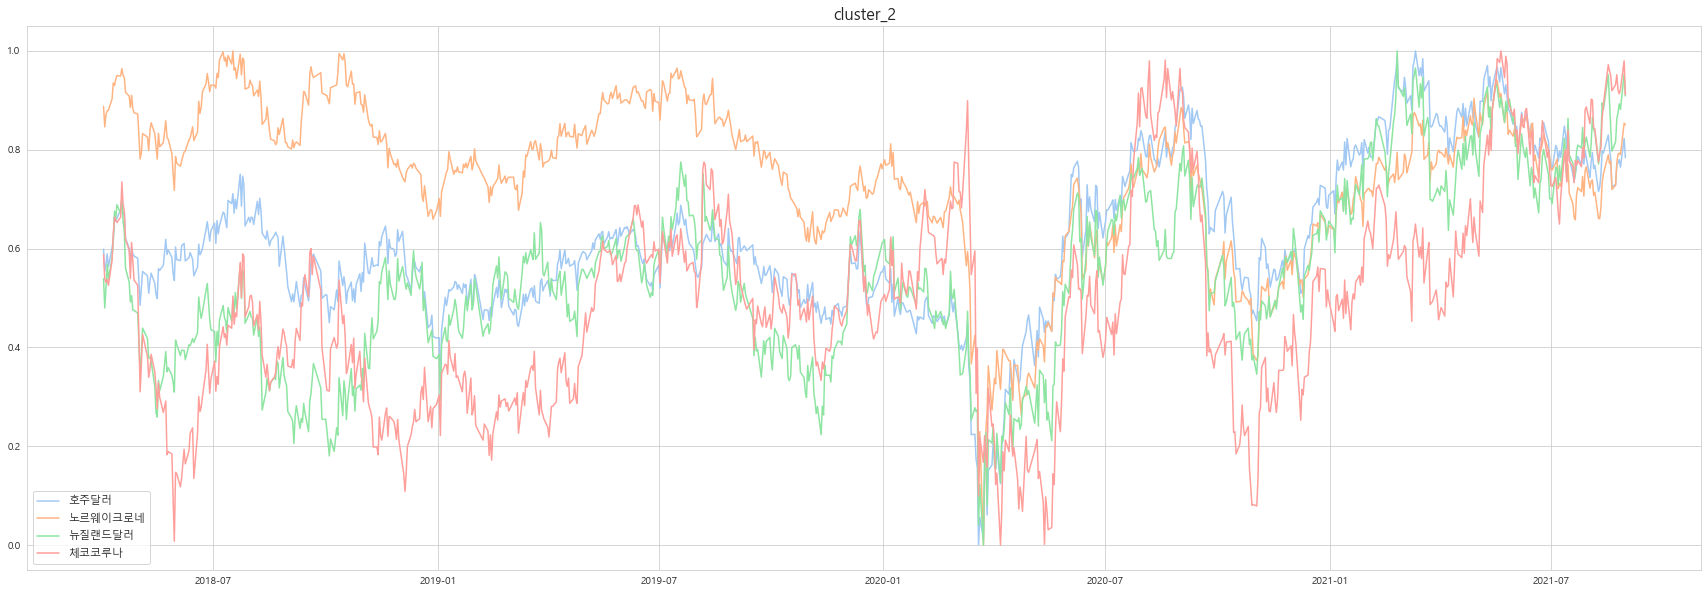

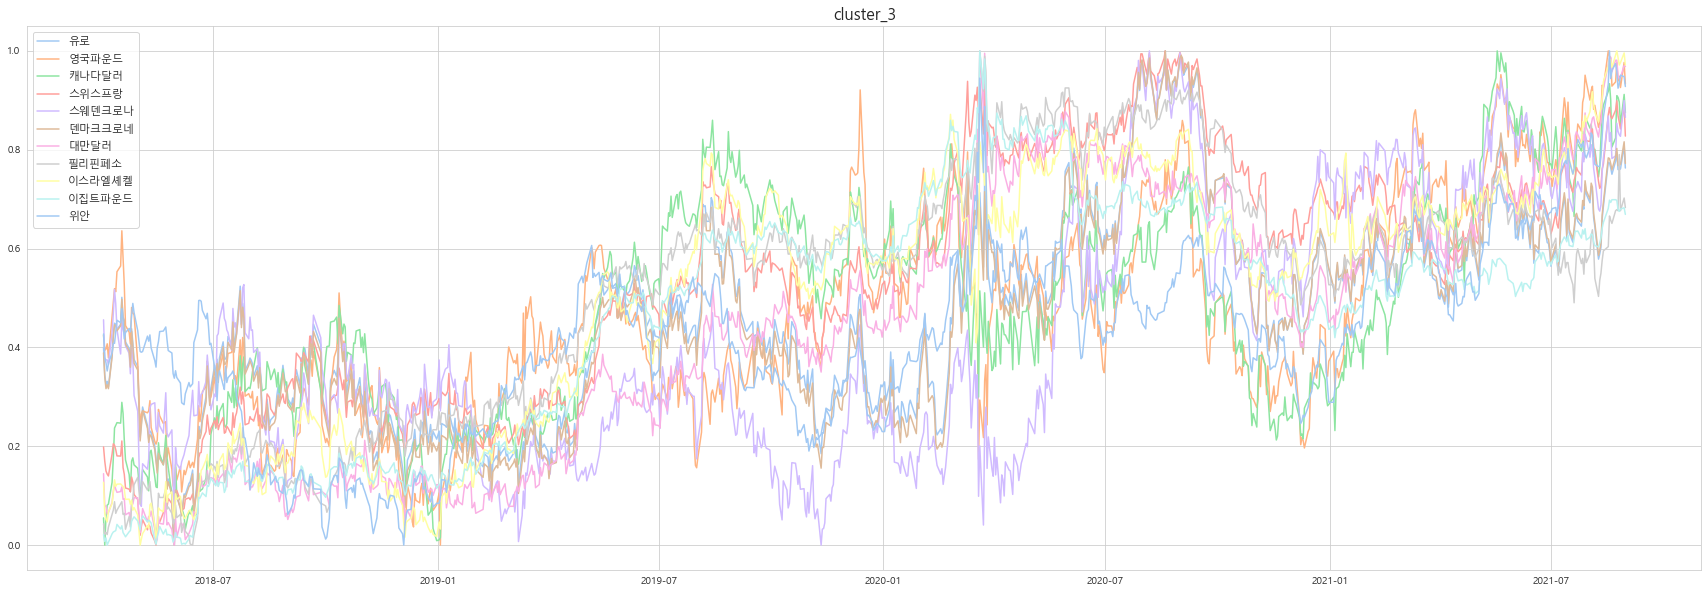

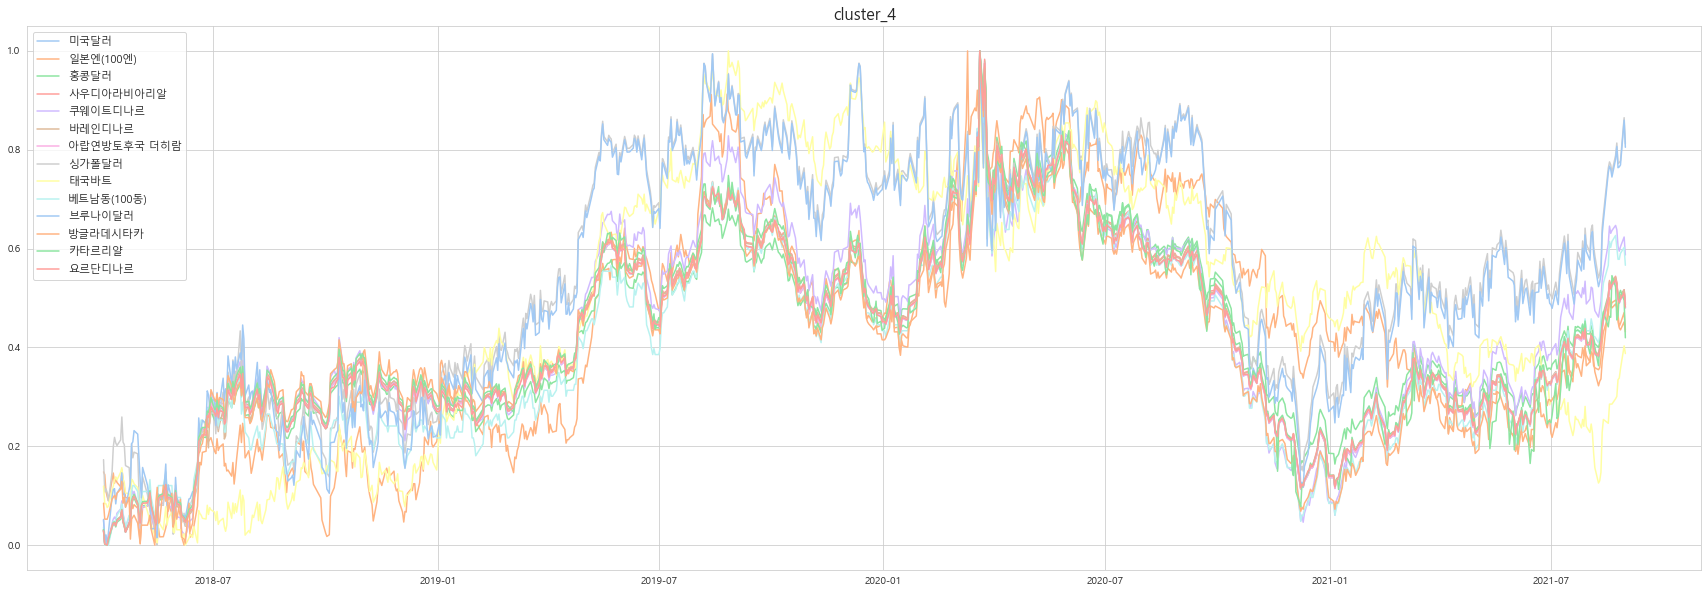

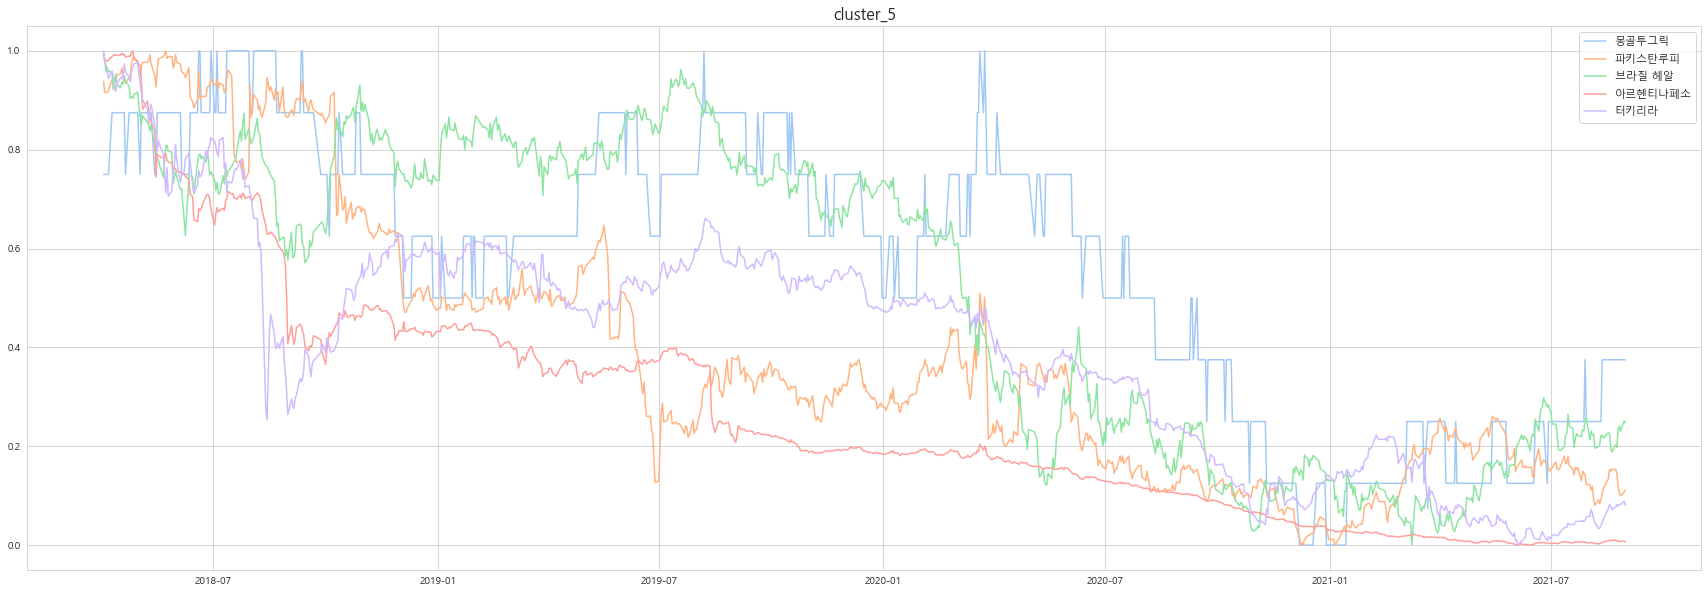

In [9]:
cluster_plot(k_num = 6)

- 확실히 k=6으로 하니 세분화 되어서 clustering이 잘 된 것 처럼 보인다.
- 실루엣으로 평가했을 때는 k=4가 최적이었고 눈으로 확인하니 k=6인거같기도 하다.
- clustering의 평가방법은 공부할 예정이고 두개중에 어떤것이 나은지는 keep해두겠다
<br></br><br></br>
- cluster별 특징은 추후의 기술예정